In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Predicting house prices based on size, bedrooms and age

np.random.seed(42)
n = 200

#Generate synthetic data
size = np.random.uniform(800, 3000, n) #square feet
bedrooms = np.random.randint(1, 6, n) #number of bedrooms
age = np.random.uniform(0, 50, n) #years old

#Create  target variable with known relationship 

price = (150 * size+ 20000 * bedrooms - 2000 * age + np.random.normal(0, 20000, n)) #add some noise


#Create DataFrame

df = pd.DataFrame ({
    "size": size,
    "bedrooms": bedrooms,
    "age": age,
    "price": price
})

In [17]:
df.head()

,size,bedrooms,age,price
0,1623.988261,4,48.059528,203814.012584
1,2891.571474,3,45.267532,362416.013364
2,2410.386672,1,9.789557,356590.750630
3,2117.048665,4,3.468065,404972.014813
4,1143.241009,4,5.038900,271455.492250


In [21]:
df.describe()

,size,bedrooms,age,price
count,200.000000,200.000000,200.000000,200.000000
mean,1864.813713,3.035000,26.651485,285914.479773
std,648.761149,1.440189,15.620382,104680.751183
min,812.148658,1.000000,0.541883,63226.724459
25%,1302.881312,2.000000,14.003384,202740.957136
50%,1887.869757,3.000000,27.983556,270246.972152
75%,2465.091155,4.000000,40.656226,372245.854966
max,2971.151261,5.000000,49.985884,492076.180816


In [23]:
#Choosing Independent Variables and the Dependent Variable 
X = df[['size', 'bedrooms', 'age']]
y = df['price']

In [25]:
#Splitting the data into a train-set, test set

X_train, X_test, y_train, y_test = train_test_split (
    X,y,
    test_size = 0.2,
    random_state = 42
)

In [29]:
print(f"Training set size:\n{X_train.shape[0]}\n")
print(f"Testing set size:\n{X_test.shape[0]}\n")

Training set size:
160

Testing set size:
40



In [31]:
#Creat and train the model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
#Examine the learned parameters 
b = model.intercept_
m = list(model.coef_)

print(f"Intercept:\n{b:,.2f}\n")
print(m)

for feature, coef in zip(X.columns, model.coef_):
    print(f" {feature}:{coef:,.2f}")

Intercept:
6,494.17

[147.18424415365098, 20490.459154827622, -2133.7873986922914]
 size:147.18
 bedrooms:20,490.46
 age:-2,133.79


- --------------------------------------------------------------------------------

In [65]:
#Make predictions

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### Residual Analysis 


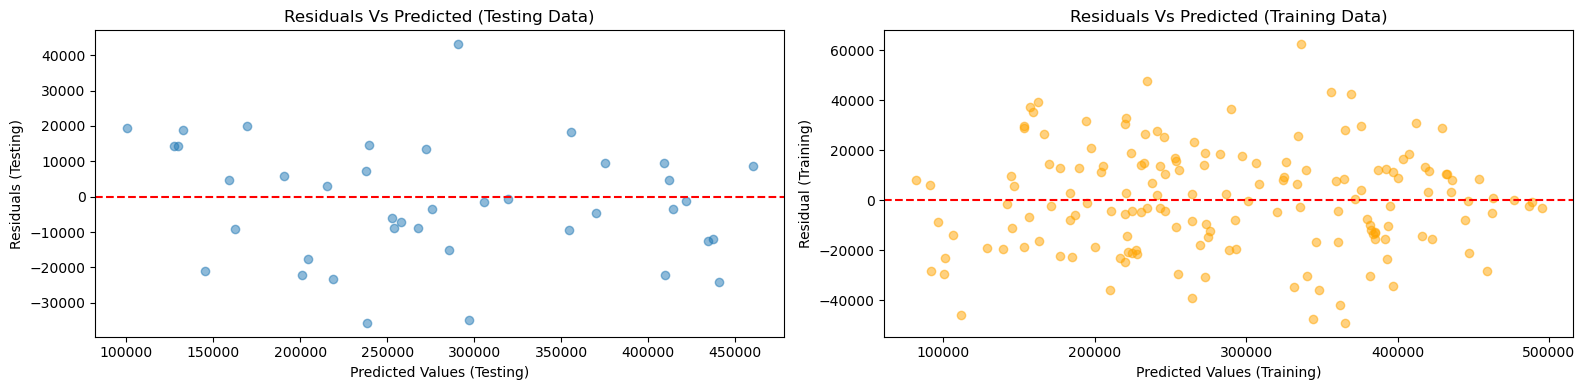

In [113]:
#Calculate residuals (ACTUAL - PREDICTED)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 1. Residuals Vs Predicted Values (Testing)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_test, residuals_test, alpha = 0.5)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.xlabel("Predicted Values (Testing)")
plt.ylabel("Residuals (Testing)")
plt.title("Residuals Vs Predicted (Testing Data)")

#2 . Residuals Vs Predicted Values (Training)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_train, residuals_train, alpha = 0.5, color = "orange")
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.xlabel("Predicted Values (Training)")
plt.ylabel("Residual (Training)")
plt.title("Residuals Vs Predicted (Training Data)")

plt.tight_layout()
plt.show()

In [75]:
#Evaluate the model


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [77]:
print(f"Training R^2 Score: {train_r2:.3f}")
print(f"Testing R^2 Score:  {test_r2:.3f}\n")
print(f"Training RMSE :     {train_rmse:.3f}")
print(f"Testing RMSE:       {test_rmse:.3f}\n")

Training R^2 Score: 0.961
Testing R^2 Score:  0.973

Training RMSE :     20731.842
Testing RMSE:       16483.926



### model explains 96.1% of the variance in the training data



Normally we expect training R² to be slightly higher than testing R²

Having testing R² (0.973) > training R² (0.961) suggests:

- Your testing set might be slightly easier to predict

- Your training set might have more noise/variability

- You got a bit lucky with your test-train split

- The model generalizes exceptionally well 